1. Preparar los datos
2. Controlar la estetica 
3. Graficar
4. Personalizar

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = sns.load_dataset('tips')
# Transformar en un DataFrame
df = pd.DataFrame(df)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Descripción de los datos: Este DataFrame contiene caracteristicas de clientes de un restaurant, total de la cuenta, propina, sexo, condición de fumador, día, tiempo de comida, tamaño de la mesa.

In [3]:
# Informacion de la tabla

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.79,8.90,3.07,13.35,17.8,24.13,50.81
tip,244.0,3.00,1.38,1.00,2.00,2.9,3.56,10.00
size,244.0,2.57,0.95,1.00,2.00,2.0,3.00,6.00


In [5]:
df.describe(include='category').T.round(2)

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [6]:
# Paso 2: Controlar la estética del gráfico

sns.set_style('darkgrid')

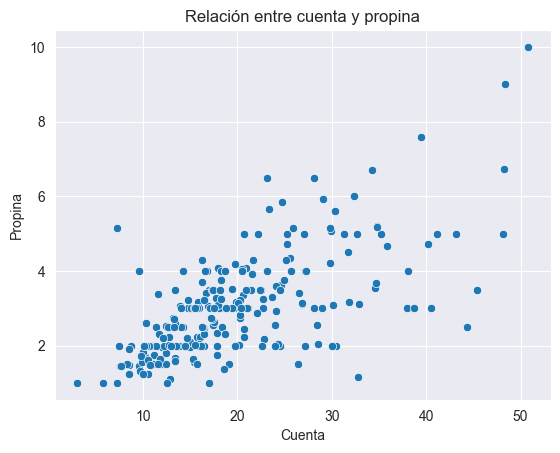

In [7]:
# Opción 1
# Paso 3: Crear gráfico
sns.scatterplot(data=df,
                x = 'total_bill',
                y = 'tip')

#Paso 4: Personalizar

plt.title('Relación entre cuenta y propina')
plt.xlabel('Cuenta')
plt.ylabel('Propina')
plt.show()

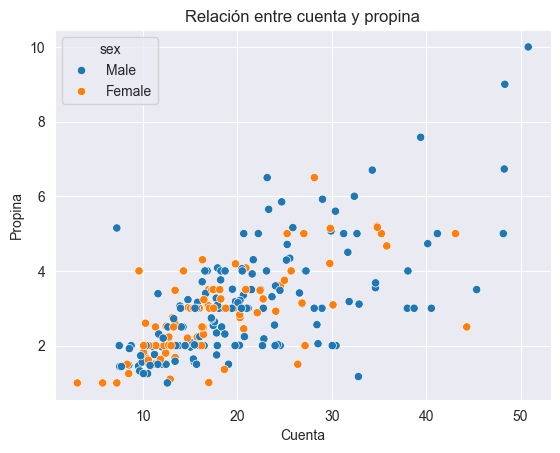

In [8]:
g = sns.scatterplot(data=df,
                x = 'total_bill',
                y = 'tip',
                hue = 'sex')

#Paso 4: Personalizar
g.set_title('Relación entre cuenta y propina')
g.set_xlabel('Cuenta')
g.set_ylabel('Propina')
plt.show()

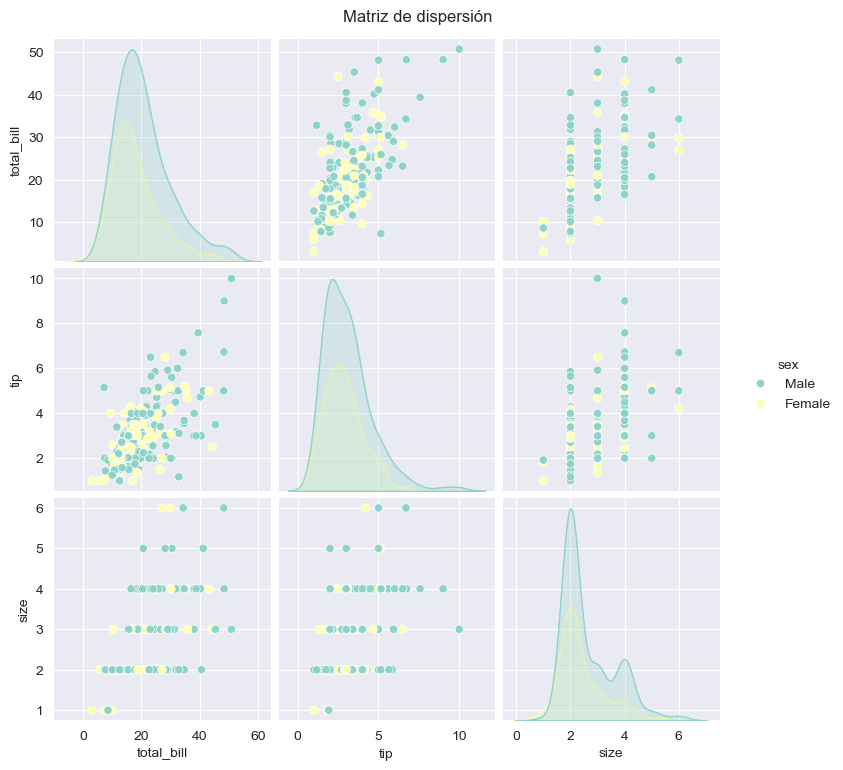

In [34]:

g = sns.pairplot(df, hue='sex', palette='Set3')
g.figure.suptitle('Matriz de dispersión', y=1.02)
plt.show()

<h4> Preguntas </h4>

1. ¿Cuál es el tamaño promedio de los grupos que dan propinas?
2. ¿Cuál es el día de la semana con mayor cantidad total de propinas?
3. ¿Cómo varía la propina promedio entre los diferentes días de la semana?
4. ¿Cuál es la relación entre el total de la cuenta y la propina dada?
5. ¿Hay alguna diferencia notable en las propinas dadas por fumadores vs no fumadores?
6. ¿Qué porcentaje de las cuentas superan los 50 dólares?
7. ¿Cómo se distribuyen las facturas por género del pagador?
8. ¿Existe alguna correlación entre el tamaño del grupo y el porcentaje de la propina?
9. ¿Cuál es el tiempo (almuerzo o cena) con el promedio más alto de cuenta total?
10. ¿Cómo se distribuye el tamaño de las propinas en los diferentes días de la semana?
11. ¿Cuál es el máximo, mínimo y promedio de las cuentas por día de la semana?
12. ¿Cómo afecta el tamaño del grupo al total de la factura?
13. ¿Cuál es la propina más alta registrada y en qué circunstancias se dio?
14. ¿Qué porcentaje de las cuentas por día de la semana son de fumadores?
15. ¿Cómo afecta ser fumador o no al tamaño promedio del grupo?

In [50]:
# 1. ¿Cuál es el tamaño promedio de los grupos que dan propinas?

len(df[df.tip > 0])
r1 = df.groupby('size').tip.mean()
r1 = pd.DataFrame(r1.round(2).reset_index())
r1

,size,tip
0,1,1.44
1,2,2.58
2,3,3.39
3,4,4.14
4,5,4.03
5,6,5.22


**OBS:** Los diagramas ideales para representar promedios son los boxplot o el diagrama de media

C:\Users\Alumno\AppData\Local\Temp\ipykernel_5704\4150686097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


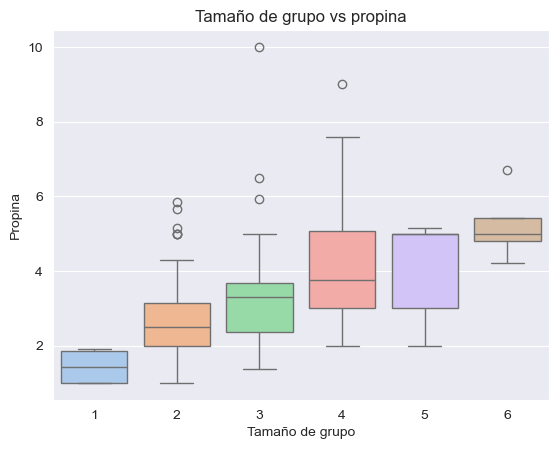

In [52]:
sns.boxplot(data=df,
            x= 'size',
            y= 'tip',
            palette='pastel')
            
plt.title('Tamaño de grupo vs propina')
plt.xlabel('Tamaño de grupo')
plt.ylabel('Propina')
plt.show()

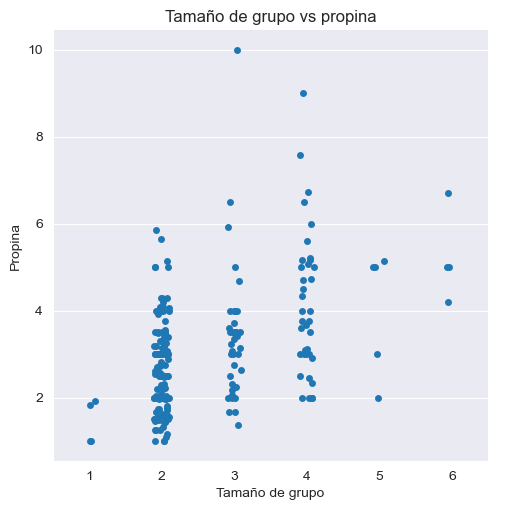

In [62]:
sns.catplot(data=df,
            x= 'size',
            y= 'tip')
            
plt.title('Tamaño de grupo vs propina')
plt.xlabel('Tamaño de grupo')
plt.ylabel('Propina')
plt.show()

In [67]:
# 2. ¿Cuál es el día de la semana con mayor cantidad total de propinas?

r2 = df.groupby('day').tip.sum()
print(f'El dia de la semana con mayor cantidad de propinas es {r2.idxmax()} con un total de {r2.max()}')

El dia de la semana con mayor cantidad de propinas es Sat con un total de 260.4


<Axes: xlabel='day', ylabel='tip'>

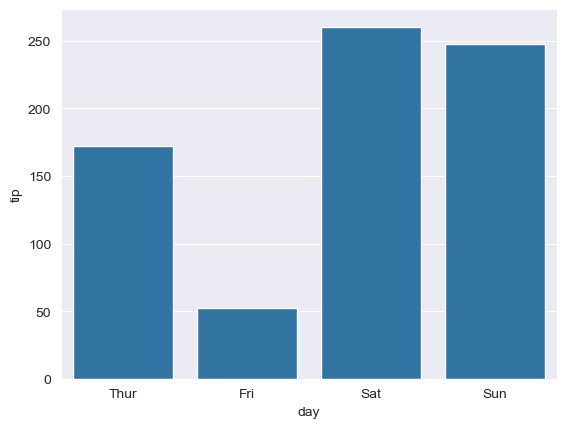

In [70]:
sns.barplot(r2)